In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1 Model Resume

In [2]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment

# exp = BiSTGNNv6Experiment(
#     dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
#     # dataset_type="ExchangeRate",
#     output_layer_type="tcn6",
#     latent_dim=32,
#     gcn_layers=2,
#     tcn_channel=16,
#     self_loop_eps=0.1,
#     tcn_layers=3,
#     pred_len=3,
#     batch_size=32,
#     horizon=1,
#     data_path='../data',
#     save_dir='../results',
#     model_type="BiSTGNNv6",
#     windows=12
# )
exp = BiSTGNNv6Experiment(
    dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=5,
    pred_len=1,
    batch_size=32,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=168
)

seed = 42
exp._setup_run(seed)
exp._check_run_exist(seed)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic
train steps: 12089
val steps: 3317
test steps: 1565
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7
resuming from ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7/run_checkpoint.pth


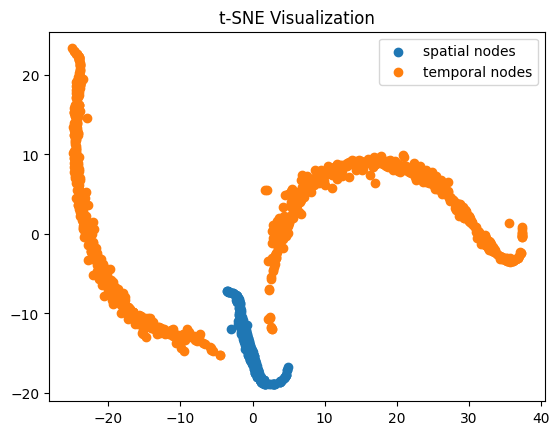

In [5]:
import numpy as np
s_emb = exp.model.temporal_encoder.static_node_embedding.weight
t_emb = exp.model.spatial_encoder.static_node_embedding.weight
# Concatenate s_emb and t_emb
combined_emb = np.concatenate((s_emb.detach().cpu().numpy(), t_emb.detach().cpu().numpy()), axis=0)

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=60, random_state=4)
combined_emb_tsne = tsne.fit_transform(combined_emb)

# Separate the t-SNE results back into s_emb and t_emb

l = len(s_emb) # + 215

s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


In [30]:
combined_emb

array([[-2.48249508e-02, -3.58751640e-02, -3.20991967e-03, ...,
        -1.34229353e-02,  4.54942137e-03,  6.20016605e-02],
       [ 2.23179776e-02,  5.40758073e-02,  3.95209808e-03, ...,
        -1.64451427e-03,  6.11922191e-03,  2.70129200e-02],
       [ 8.40791762e-02, -3.39238085e-02,  1.64943542e-02, ...,
         7.61721237e-03,  6.05965927e-02,  2.08788291e-02],
       ...,
       [ 2.21468415e-03,  1.26065908e-03,  1.81012284e-02, ...,
        -3.95049870e-01, -2.67015595e-04, -3.51251364e-02],
       [ 1.34977885e-03,  1.19355961e-03, -8.00690555e-04, ...,
        -1.09158725e-01, -6.08969538e-04, -1.45085096e-01],
       [-1.75943261e-03, -9.20413882e-02,  4.71923355e-04, ...,
        -5.49580145e-04,  1.81156676e-04,  5.78436302e-05]], dtype=float32)

# 1 data over view

In [172]:
# import torch
# for x, y, x_date_enc, y_date_enc in exp.dataloader.test_loader:
# # batch_x = torch.from_numpy(x).float().unsqueeze(0).to("cuda:0")
# # batch_x_date_enc = torch.from_numpy(x).float().unsqueeze(0).to("cuda:0")
#     predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
#     break

In [173]:
exp.model.spatial_encoder.static_node_embedding,exp.model.temporal_encoder.static_node_embedding

(Embedding(7, 16), Embedding(288, 16))

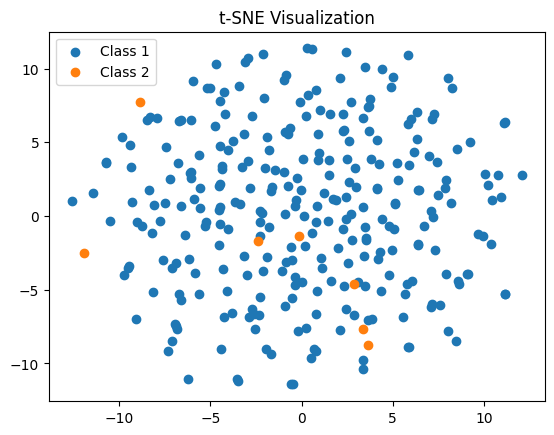

In [92]:
215 * 5 / 60

17.916666666666668

In [148]:
combined_emb_tsne[l-1]

array([ 0.45480874, 17.813908  ], dtype=float32)

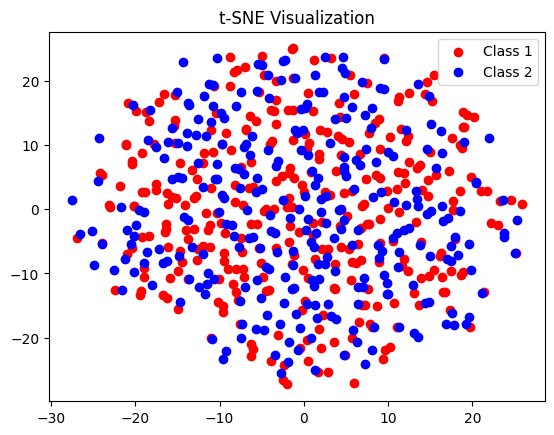

In [63]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have s_emb and t_emb defined as NumPy arrays
s_emb = np.random.rand(325, 16)  # Replace with your actual s_emb data
t_emb = np.random.rand(288, 16)  # Replace with your actual t_emb data

# Concatenate s_emb and t_emb
combined_emb = np.concatenate((s_emb, t_emb), axis=0)

# Create labels for s_emb and t_emb
s_labels = np.zeros(len(s_emb))  # Class 1
t_labels = np.ones(len(t_emb))   # Class 2
combined_labels = np.concatenate((s_labels, t_labels), axis=0)

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
combined_emb_tsne = tsne.fit_transform(combined_emb)

# Separate the t-SNE results by class
s_emb_tsne = combined_emb_tsne[combined_labels == 0]
t_emb_tsne = combined_emb_tsne[combined_labels == 1]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='Class 1', c='red')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='Class 2', c='blue')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


In [34]:
batch_x.size()

torch.Size([1, 288, 325])

# 2 Graph Learning 

## 2.1 Learned graph and heterogeneity

In [10]:
import torch

which = 0 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0)
batch_y = torch.tensor(batch_y).unsqueeze(0)
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0)
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0)
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0)

In [14]:
batch_x.shape

torch.Size([1, 96, 8])

In [15]:
exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to('cuda:0')
pred_y = exp.model(batch_x, batch_x_date_enc)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument tensors in method wrapper_CUDA_cat)

(3, 207)

In [51]:
pred_y.shape

(12, 207)

# 3  case study of leaned node static embeddings

## 3.1 single step

### traffic 24 horizon


Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic
train steps: 12089
val steps: 3317
test steps: 1565
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7
resuming from ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7/run_checkpoint.pth


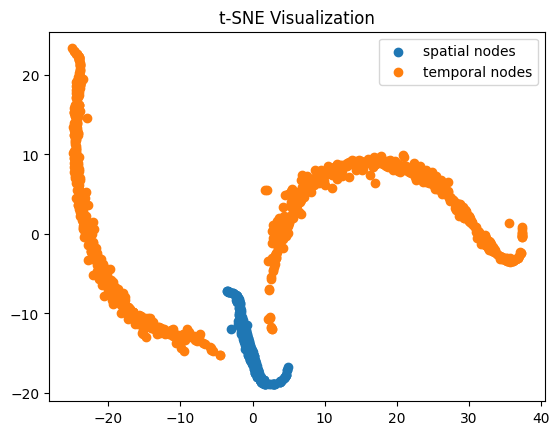

In [6]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment

exp = BiSTGNNv6Experiment(
    dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=5,
    pred_len=1,
    batch_size=32,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=168
)

seed = 42
exp._setup_run(seed)
exp._check_run_exist(seed)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
import numpy as np
s_emb = exp.model.temporal_encoder.static_node_embedding.weight
t_emb = exp.model.spatial_encoder.static_node_embedding.weight
# Concatenate s_emb and t_emb
combined_emb = np.concatenate((s_emb.detach().cpu().numpy(), t_emb.detach().cpu().numpy()), axis=0)

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=60, random_state=4)
combined_emb_tsne = tsne.fit_transform(combined_emb)


l = len(s_emb) # + 215

s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


In [ ]:
# 3  case study of leaned node static embeddings

# 4  case study of leaned HSTG

## 4.1 single step

### 1. ExchangeRate

In [26]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment

device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="ExchangeRate", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.5,
    tcn_layers=3,
    pred_len=1,
    batch_size=32,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=96,
    device=device
)

seed = 42
exp._setup_run(seed)
# exp._check_run_exist(seed)
# exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/exchange_rate/exchange_rate.csv
train steps: 5192
val steps: 1398
test steps: 641
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/ExchangeRate/w96h24s1/a609cfbec5d6a0bd8e06930489db5d29
resuming from ../results/runs/BiSTGNNv6/ExchangeRate/w96h24s1/a609cfbec5d6a0bd8e06930489db5d29/run_checkpoint.pth


In [76]:
import torch

# 670 发生异常 0正常
which = 670 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)

In [77]:
# 图卷积之后的node embedding
# x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(batch_x.transpose(1,2), batch_x_date_enc)
# X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)

In [78]:
adj_matrix = A[0].detach().cpu().numpy()

In [79]:
original_x = x[0].detach().cpu().numpy()
original_x.shape

(8, 96)

In [80]:
original_x

array([[0.7141    , 0.7165    , 0.7205    , 0.7194    , 0.7208    ,
        0.7176    , 0.7222    , 0.7223    , 0.7224    , 0.7196    ,
        0.7187    , 0.715     , 0.7184    , 0.7201    , 0.7184    ,
        0.7143    , 0.691     , 0.695     , 0.6909    , 0.6968    ,
        0.689     , 0.6935    , 0.6936    , 0.6881    , 0.6842    ,
        0.6881    , 0.6839    , 0.6843    , 0.6893    , 0.6822    ,
        0.6843    , 0.6829    , 0.6887    , 0.6916    , 0.6924    ,
        0.6934    , 0.6942    , 0.6902    , 0.6873    , 0.6881    ,
        0.6894    , 0.6916    , 0.691     , 0.6904    , 0.6885    ,
        0.6895    , 0.6894    , 0.689     , 0.6818    , 0.6735    ,
        0.67      , 0.669     , 0.672     , 0.6736    , 0.6736    ,
        0.6698    , 0.6723    , 0.669     , 0.6655    , 0.672     ,
        0.672     , 0.675     , 0.6735    , 0.6812    , 0.6793    ,
        0.6755    , 0.6782    , 0.6762    , 0.6694    , 0.67      ,
        0.6705    , 0.6764    , 0.6774    , 0.68

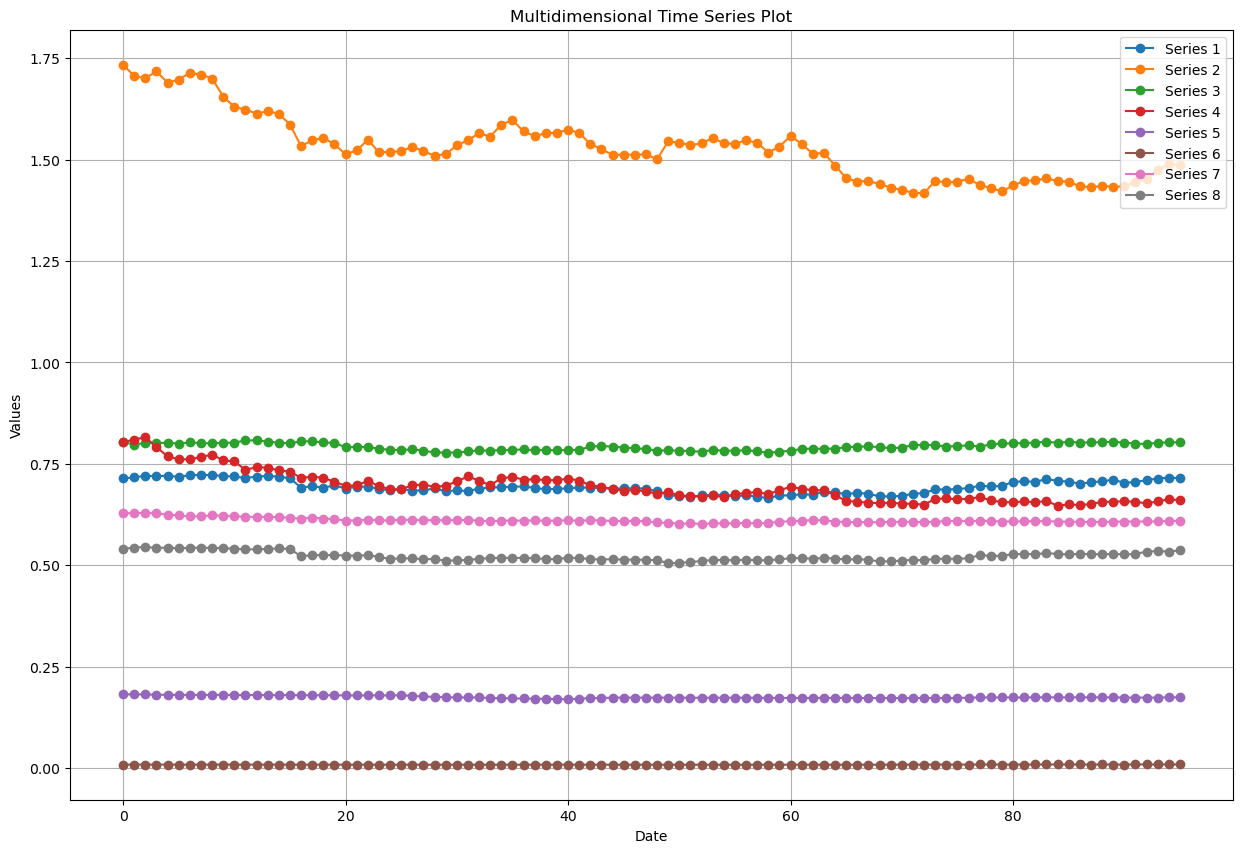

In [81]:
# 创建多维时序图
plt.figure(figsize=(15, 10))
N = original_x.shape[0]
# 绘制每个维度的时序数据
for i in range(N):
    plt.plot(original_x[i, :], marker='o', label=f'Series {i+1}')
plt.title('Multidimensional Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


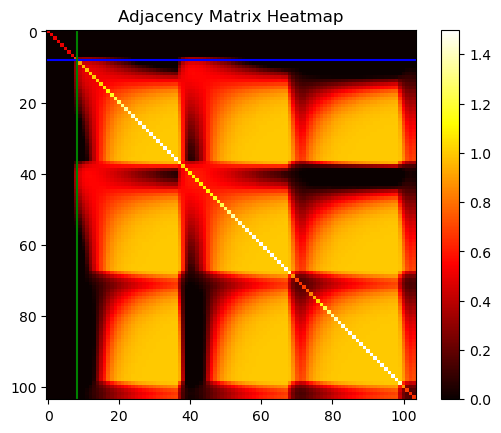

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



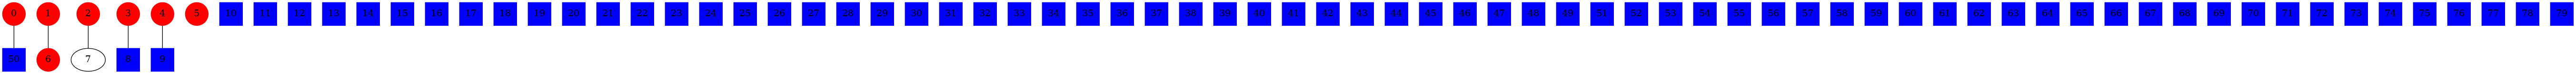

In [97]:
import pygraphviz as pgv
from IPython.display import Image

# 创建一个图对象
G = pgv.AGraph(strict=True, directed=False)

# 添加第一类节点
for i in range(7):
    G.add_node(i, shape='circle', color='red', style='filled')

# 添加第二类节点
for i in range(8, 80):
    G.add_node(i, shape='square', color='blue', style='filled')

# 添加边（假设你有二部图的邻接关系）
edges = [(0, 50), (1, 6), (2, 7), (3, 8), (4, 9)]  # 这些是示例边
for edge in edges:
    G.add_edge(*edge)

# 绘制图形
G.layout(prog='dot')  # 使用 dot 布局
G.draw('bipartite_graph.png')
Image('bipartite_graph.png')

### Traffic

In [18]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=5,
    pred_len=1,
    batch_size=32,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=168,
    device=device
)

seed = 42
exp._setup_run(seed)
exp._check_run_exist(seed)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic
train steps: 12089
val steps: 3317
test steps: 1565
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/23846293342212c07143b3fda7e9717f
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/23846293342212c07143b3fda7e9717f


In [19]:
import torch

which = 300 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)

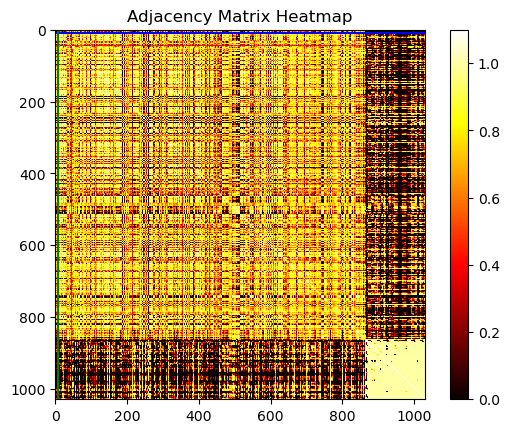

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



### ETTh1

In [105]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="ETTh1", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.5,
    tcn_layers=3,
    pred_len=1,
    batch_size=32,
    dilated_factor=2,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=384,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/ETTh1/ETTh1.csv
train steps: 11787
val steps: 3077
test steps: 1335
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/ETTh1/w384h24s1/4c8b0264abf8f84efd7ed3f39f3b9a30
resuming from ../results/runs/BiSTGNNv6/ETTh1/w384h24s1/4c8b0264abf8f84efd7ed3f39f3b9a30/run_checkpoint.pth


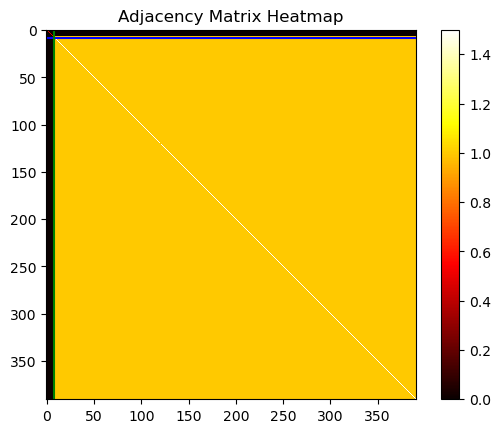

In [106]:
import torch

which = 1000 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



Using downloaded and verified file: ../data/ETTm1/ETTm1.csv
train steps: 48369
val steps: 13529
test steps: 6561
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/ETTm1/w384h24s1/3a614250ce356a0bb95d37b6f0628171
resuming from ../results/runs/BiSTGNNv6/ETTm1/w384h24s1/3a614250ce356a0bb95d37b6f0628171/run_checkpoint.pth


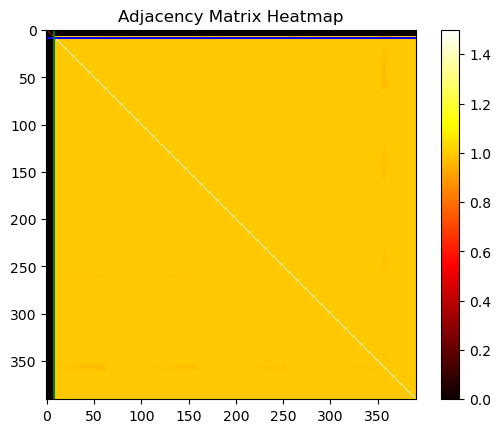

In [109]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="ETTm1", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.5,
    tcn_layers=3,
    pred_len=1,
    batch_size=32,
    dilated_factor=2,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=384,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
import torch

which = 1000 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



In [111]:
adj_matrix[-1]

array([2.7138947e-41, 2.7138947e-41, 2.7138947e-41, 2.7138947e-41,
       2.7138947e-41, 2.7138947e-41, 2.7138947e-41, 9.9918008e-01,
       9.9998283e-01, 9.9999750e-01, 9.9999905e-01, 9.9999958e-01,
       9.9999970e-01, 9.9999976e-01, 9.9999976e-01, 9.9999982e-01,
       9.9999982e-01, 9.9999988e-01, 9.9999988e-01, 9.9999988e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e

## 4.2 Multi-step

### 1. PEMS-04

/root/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


train steps: 11871
val steps: 3375
test steps: 1677
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/PEMS04/w12h1s12/4765c4dc8f4a537cee036056469c37e0


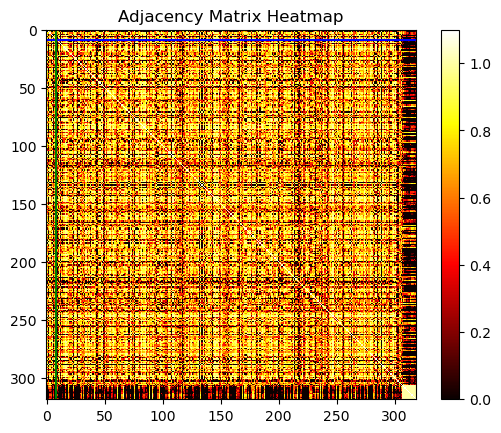

In [3]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="PEMS04", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=3,
    batch_size=32,
    dilated_factor=2,
    horizon=1,
    pred_len=12,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=12,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
import torch

which = 1000 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



## METR-LA

#### 0 

train steps: 23967
val steps: 6831
test steps: 3405
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/METR_LA/w12h1s12/8ae369b4aa49fbef8191ce4cc98fefc9


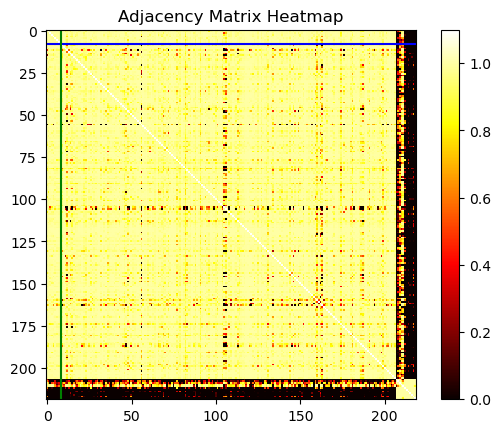

In [4]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="METR_LA", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=3,
    batch_size=32,
    dilated_factor=2,
    horizon=1,
    pred_len=12,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=12,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
import torch

which = 0  # 1000

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



In [20]:
from torch_timeseries.datasets.metr_la import METR_LA


dataset = METR_LA('/notebooks/pytorch_timeseries/data')
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
# drawed_data = dataset.df.iloc[0:12].copy()
drawed_data = dataset.df.iloc[0:12].copy()
selected_columns = [ 1,2,3,4,5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=list(range(len(drawed_data.index))), y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()



##### part

207

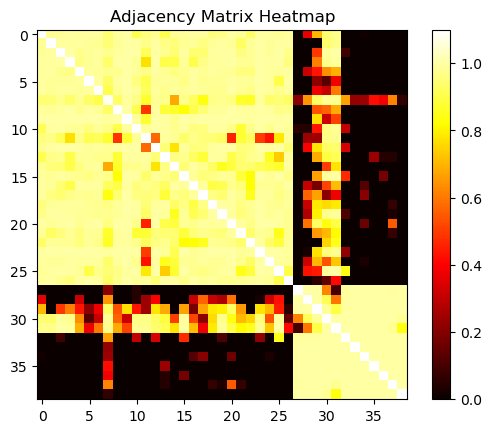

In [19]:

import numpy as np
window = 12
# smaller_matrix = adj_matrix[np.ix_(selected_columns, selected_columns)]
selected_s_indices = selected_columns
selected_t_indices = list(range(dataset.num_features, dataset.num_features + window))
smaller_matrix = adj_matrix[np.ix_(selected_s_indices + selected_t_indices, 
                                   selected_s_indices + selected_t_indices)]

# 使用 matplotlib 绘制热力图
plt.imshow(smaller_matrix, cmap='hot', interpolation='nearest')
# plt.axhline(y=8, color='blue', linestyle='-')
# plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

array([[1.0988326 , 0.983405  , 0.9876425 , 0.992616  , 0.9888262 ,
        0.99433994, 0.9944785 , 0.9414881 , 0.9884493 , 0.99902236,
        0.9095674 , 0.9540989 , 0.9794253 , 0.90323603, 0.98190135,
        0.98839647, 0.99632895, 0.993566  , 0.        , 0.3645355 ,
        0.7010556 , 0.94438356, 0.97511315, 0.        , 0.        ,
        0.01485781, 0.        , 0.        , 0.        , 0.        ],
       [0.983405  , 1.0992054 , 0.99630487, 0.99060106, 0.99320203,
        0.98695165, 0.9839055 , 0.9495498 , 0.9864545 , 0.99777514,
        0.99549764, 0.9696588 , 0.99392885, 0.96821856, 0.9508182 ,
        0.9836254 , 0.9851328 , 0.9616428 , 0.        , 0.        ,
        0.        , 0.93470573, 0.9700626 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.9876425 , 0.99630487, 1.0992789 , 0.9978511 , 0.97436935,
        0.9856499 , 0.98965144, 0.97152364, 0.9915997 , 0.998919  ,
        0.9978411 , 0.9183539 , 0.99828595, 0.

#### 1000

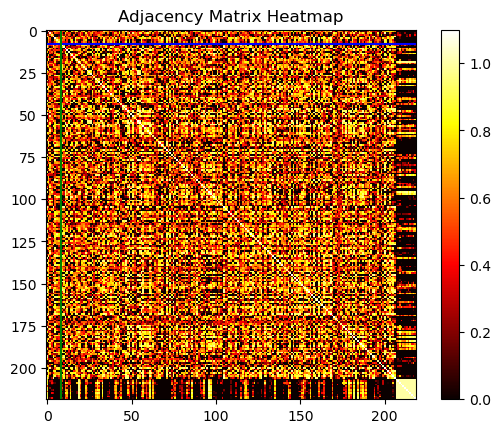

In [21]:

which = 1000

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()


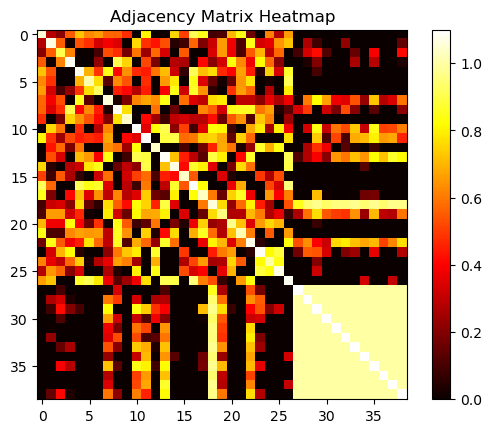

In [23]:

import numpy as np
window = 12
# smaller_matrix = adj_matrix[np.ix_(selected_columns, selected_columns)]
selected_s_indices = selected_columns
selected_t_indices = list(range(dataset.num_features, dataset.num_features + window))
smaller_matrix = adj_matrix[np.ix_(selected_s_indices + selected_t_indices, 
                                   selected_s_indices + selected_t_indices)]

# 使用 matplotlib 绘制热力图
plt.imshow(smaller_matrix, cmap='hot', interpolation='nearest')
# plt.axhline(y=8, color='blue', linestyle='-')
# plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

In [22]:
dataset = METR_LA('/notebooks/pytorch_timeseries/data')
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
# drawed_data = dataset.df.iloc[0:12].copy()
drawed_data = dataset.df.iloc[1000:1012].copy()
# selected_columns = [ 1,2,3,4,5, 6,7,8,9,10,11,12,13,14,15,16,17,18]

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=drawed_data.index, y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()

